# Exploratory Data Analysis.
## Zomato Dataset
---
**https://www.kaggle.com/datasets/narsingraogoud/zomato-restaurants-dataset-for-metropolitan-areas?select=zomato_dataset.csv**



**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
FILE_PATH = "./zomato_dataset.csv"

**Reading the dataset**

In [3]:
zomato_df = pd.read_csv(FILE_PATH)
zomato_df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [4]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [5]:
# Unique Values for each columns
zomato_df.nunique()

Restaurant Name      826
Dining Rating         24
Delivery Rating       18
Dining Votes         294
Delivery Votes       263
Cuisine               48
Place Name           324
City                  17
Item Name          55693
Best Seller           13
Votes                760
Prices              2710
dtype: int64

In [6]:
# check for Nan values.
zomato_df.isnull().values.any()

True

**Checking for null values in the each columns**

In [7]:
for col in zomato_df.columns:
    print("Column - {} has {} null values.\n"
          .format(col,zomato_df[col].isnull().sum()),"-"*50)

Column - Restaurant Name has 0 null values.
 --------------------------------------------------
Column - Dining Rating has 32236 null values.
 --------------------------------------------------
Column - Delivery Rating has 1280 null values.
 --------------------------------------------------
Column - Dining Votes has 0 null values.
 --------------------------------------------------
Column - Delivery Votes has 0 null values.
 --------------------------------------------------
Column - Cuisine  has 0 null values.
 --------------------------------------------------
Column - Place Name has 0 null values.
 --------------------------------------------------
Column - City has 0 null values.
 --------------------------------------------------
Column - Item Name has 0 null values.
 --------------------------------------------------
Column - Best Seller has 95715 null values.
 --------------------------------------------------
Column - Votes has 0 null values.
 ---------------------------------

### Analysis on the a City 

In [8]:
# lets check for which cities are available in the dataset

cities = zomato_df['City'].unique()
for i,city in enumerate(cities):
    print("{}. {}.".format(i+1,city))

1.  Hyderabad.
2.  Mumbai.
3.  Chennai.
4.  Pune.
5.  Jaipur.
6.  Kochi.
7.  Goa.
8.  Bangalore.
9.  Kolkata.
10.  Ahmedabad.
11.  Banaswadi.
12.  Ulsoor.
13.  Malleshwaram.
14.  Magrath Road.
15.  Lucknow.
16.  New Delhi.
17.  Raipur.


<strong>Lets do the analysis for Goa,
As this place is most visited for parties and who likes parties without drinks and food.</strong>

## GOA

In [9]:
goa = zomato_df['City'] == ' Goa'
drinks = zomato_df[goa]['Cuisine '] == "Beverages"
zomato_df[goa][drinks][["Restaurant Name","Dining Rating","Item Name","Prices"]]

,Restaurant Name,Dining Rating,Item Name,Prices
63090,Ritz Classic,4.4,Prawns Biryani,480.0
63091,Ritz Classic,4.4,Kingfish Rava Fry [2 Pieces],650.0
63092,Ritz Classic,4.4,Chicken Hyderabadi Biryani,350.0
63093,Ritz Classic,4.4,Chonak Masala Fry [2 Pieces],650.0
63094,Ritz Classic,4.4,Crab Tandoori,610.0
...,...,...,...,...
65064,Shivam Classic,NaN,Tomato Raita,90.0
65065,Shivam Classic,NaN,Aloo Raita,90.0
65066,Shivam Classic,NaN,Green Salad,90.0
65067,Shivam Classic,NaN,Masala Papad,70.0


**1. Which resturants deliver in goa with Delivery Rating more than 3.8?**

In [38]:
# filter by Delivery Rating groupby Restaurant Name and then show Item Name

delivery_rating = zomato_df[goa]['Delivery Rating'] >= 3.8

data = zomato_df[goa][delivery_rating].groupby("Restaurant Name").first()\
.sort_values(by="Dining Rating",ascending=False)[["Item Name","Delivery Rating","Dining Rating"]].dropna()

data

,Item Name,Delivery Rating,Dining Rating
Restaurant Name,,,
Ritz Classic,Prawns Biryani,4.1,4.4
Cafe Central,Date and Walnut Cake [500 grams],4.0,3.9
The Royal Ruchik,Prawn Rawa Fry,4.2,3.6


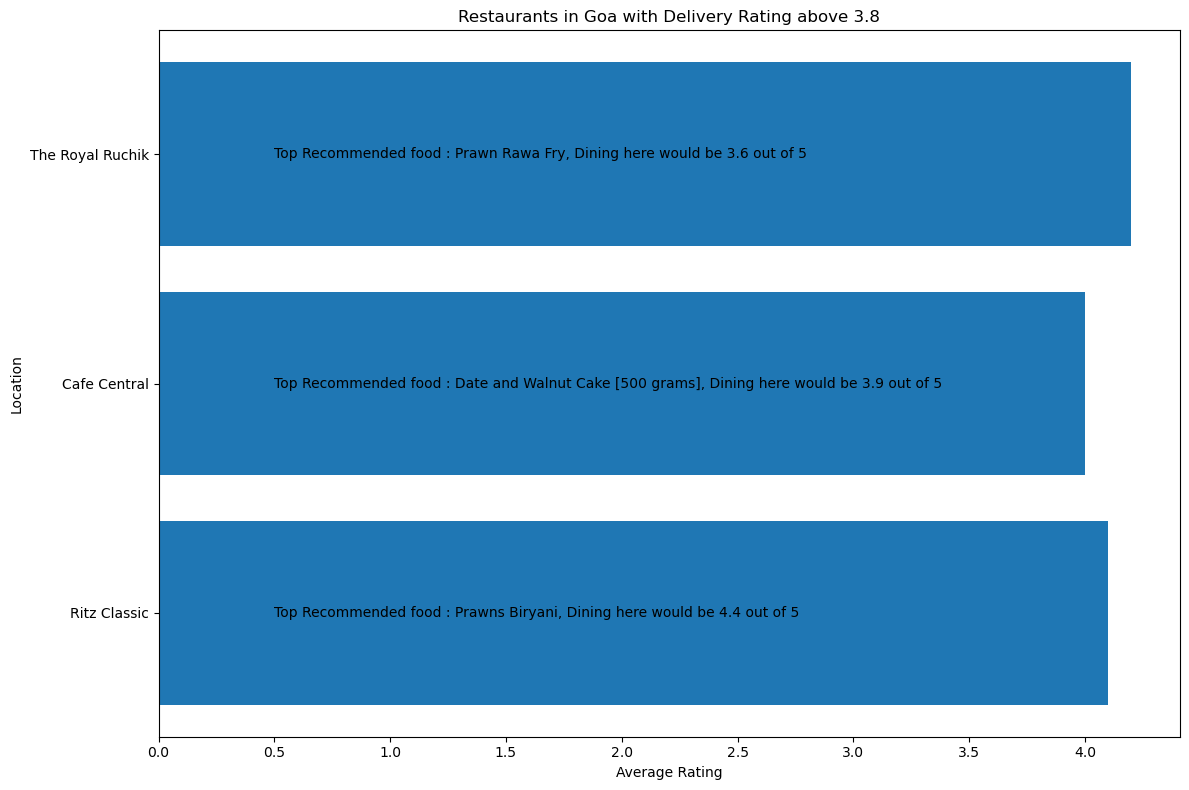

In [41]:
plt.figure(figsize=(12, 8))
plt.barh(data.index, data["Delivery Rating"])

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.title('Restaurants in Goa with Delivery Rating above 3.8')

# Add data labels to the bars
for i, rating in enumerate(data["Item Name"]):
    plt.text(0.5, i, "Top Recommended food : {}, Dining here would be {} out of 5".format(rating,data.iloc[i]["Dining Rating"]), va='center')

plt.tight_layout()
plt.show()

In [42]:
# plot = sns.barplot(data, 
#             x=data.index, 
#             y="Delivery Rating")
# plot.set(title='Restaurants in Goa with Dining Rating above 3.8')
# plot = plot.set_xticklabels(plot.get_xticklabels(), rotation=30);

In [43]:
# # Filter the DataFrame to include only chicken biryani
# chicken_biryani_df = zomato_df[zomato_df['Item Name'] == 'Chicken Biryani']

# # Group the DataFrame by location and calculate the average rating for chicken biryani
# location_ratings = chicken_biryani_df.groupby('Place Name')['Dining Rating'].mean()

# # Sort the locations based on the average rating in descending order
# sorted_locations = location_ratings.sort_values(ascending=False)

# # Select the top 20 locations with the highest average rating
# top_20_locations = sorted_locations[:20]

# # Create a bar plot to visualize the ratings for the top 20 locations
# plt.figure(figsize=(12, 8))
# plt.barh(top_20_locations.index, top_20_locations.values, color='brown')

# # Add labels and title
# plt.xlabel('Average Rating')
# plt.ylabel('Location')
# plt.title('Top 20 Locations with the Highest Average Rating for Chicken Biryani')

# # Invert the y-axis to display locations from top to bottom
# plt.gca().invert_yaxis()

# # Add data labels to the bars
# for i, rating in enumerate(top_20_locations.values):
#     plt.text(rating + 0.1, i, f'{rating:.2f}', va='center')

# plt.tight_layout()
# plt.show()

**2. I'm a food blogger and wanted to have every Chicken cuisine in India, so I analyzed the data with price, city and which restaurant it  belongs to.**

In [82]:
# Get every restaurant with chicken in there menu
chicken_df = zomato_df['Item Name'].str.contains(r'\w*Chicken\w*')
chicken_df = zomato_df[chicken_df][["Restaurant Name","City","Prices","Dining Rating","Item Name"]].reset_index()
chicken_df

,index,Restaurant Name,City,Prices,Dining Rating,Item Name
0,1,Doner King,Hyderabad,129.0,3.9,Chicken Rumali Shawarma
1,2,Doner King,Hyderabad,189.0,3.9,Chicken Tandoori Salad
2,3,Doner King,Hyderabad,189.0,3.9,Chicken BBQ Salad
3,5,Doner King,Hyderabad,199.0,3.9,Chicken Tandoori Pizza [8 inches]
4,7,Doner King,Hyderabad,165.0,3.9,Chicken Popcorn [20 Pieces]
...,...,...,...,...,...,...
23467,123552,Ariena Boutique Hotel,Raipur,525.0,3.9,Stir Fried Chicken with Cahsew Nut
23468,123594,Ariena Boutique Hotel,Raipur,475.0,3.9,Chicken Tikka Biryani
23469,123618,Ariena Boutique Hotel,Raipur,475.0,3.9,Chicken Chinese Chopsuey
23470,123626,Ariena Boutique Hotel,Raipur,295.0,3.9,Chicken Salad Pepper Corn


In [84]:
# Group by city
chicken_city = chicken_df.groupby("City")\
        .nth(range(1,4))\
        .sort_values(by="Dining Rating",ascending=False)\
        .sort_values(by="Prices",ascending=True)\
        [["Item Name","Restaurant Name","Dining Rating","Prices"]].\
        dropna()
chicken_city[chicken_city.index == " Pune"]

,Item Name,Restaurant Name,Dining Rating,Prices
City,,,,
Pune,Mini Chicken Burger,Burger - Since 1989,4.0,80.0
Pune,Chicken Steak Burger,Burger - Since 1989,4.0,120.0
Pune,Chicken Mix Surprise Roll,Burger - Since 1989,4.0,140.0


In [87]:
city_filter = zomato_df["City"] == city
chicken_city[chicken_city.index == city]["Dining Rating"]

City
 Pune    4.0
 Pune    4.0
 Pune    4.0
Name: Dining Rating, dtype: float64

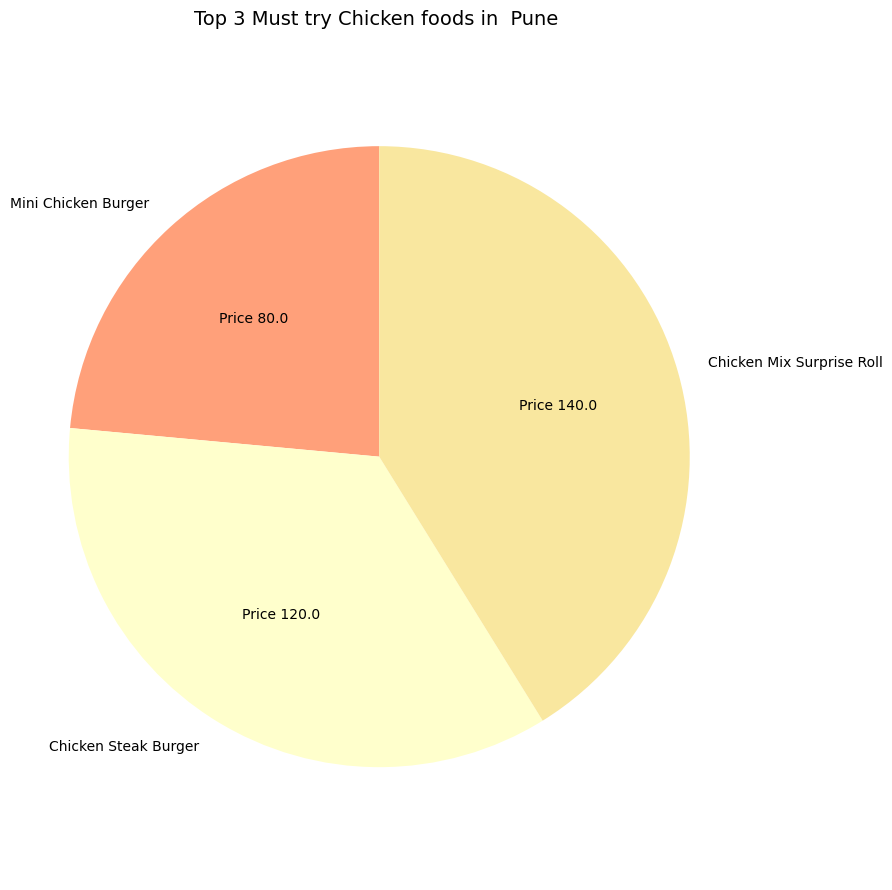

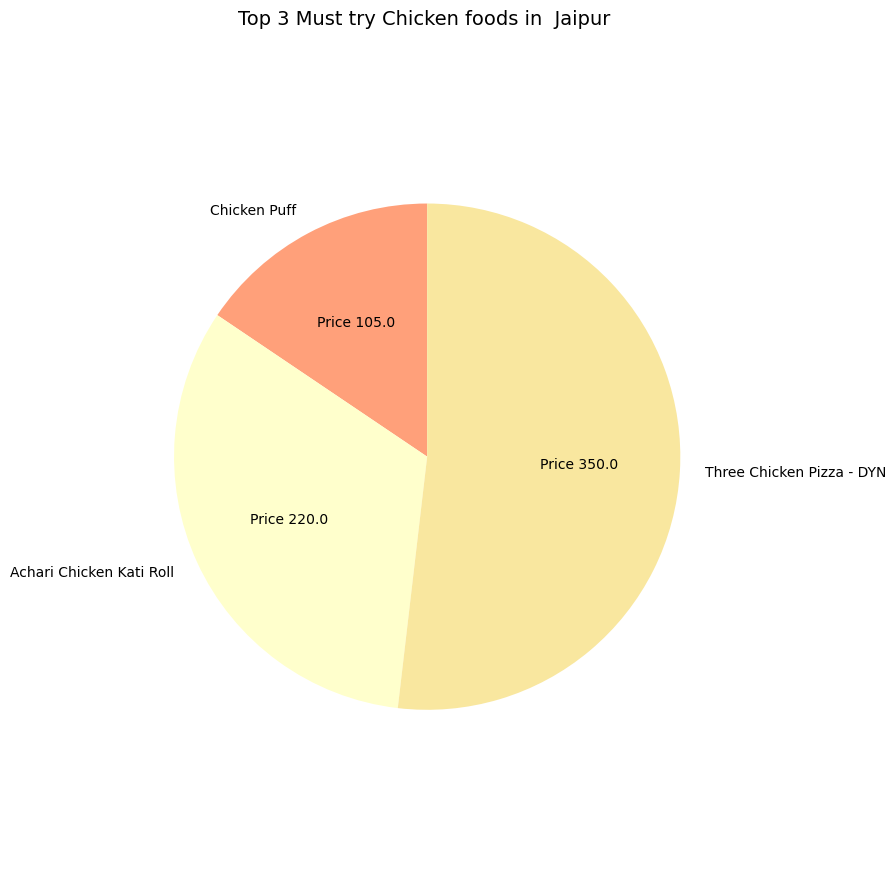

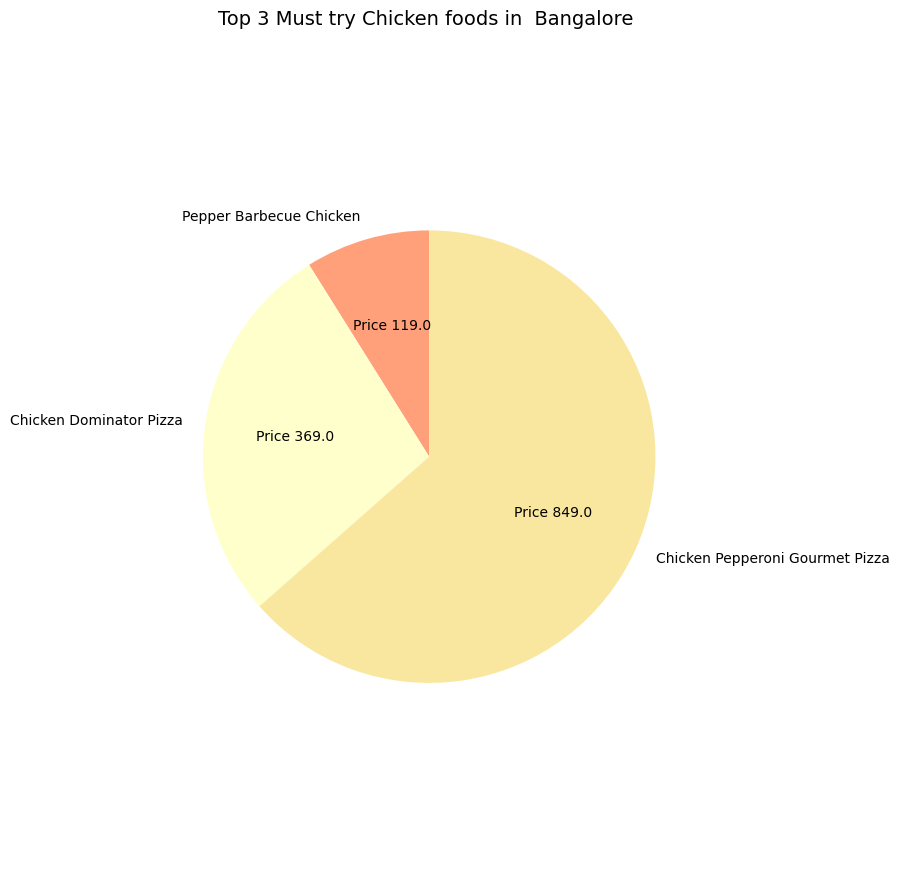

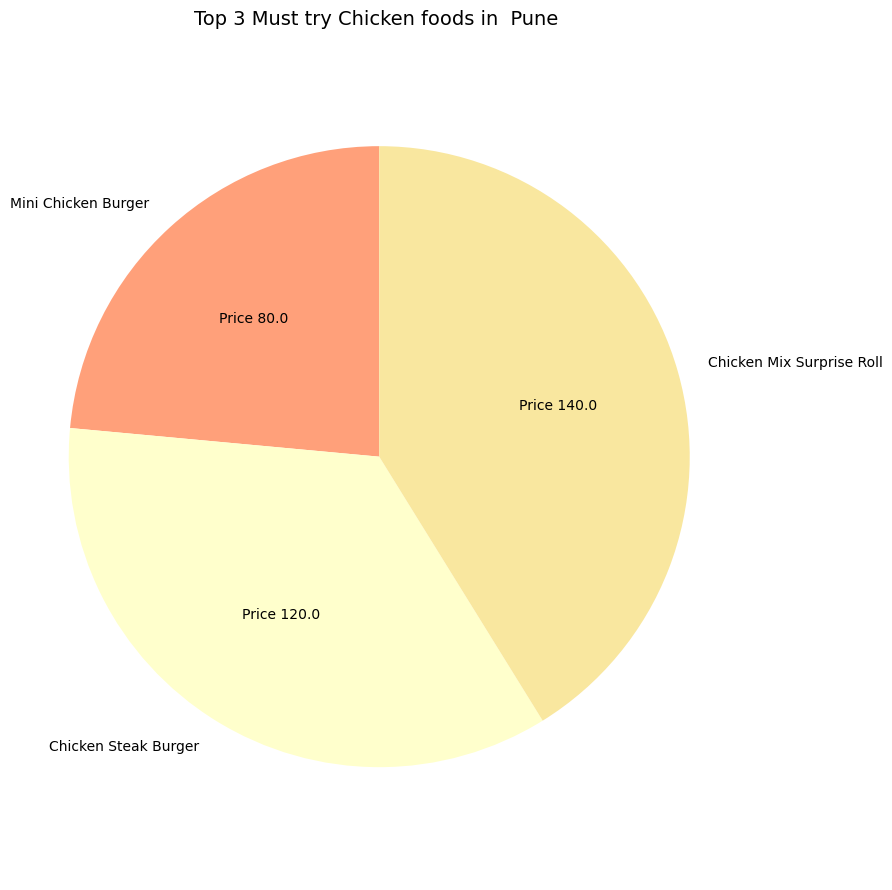

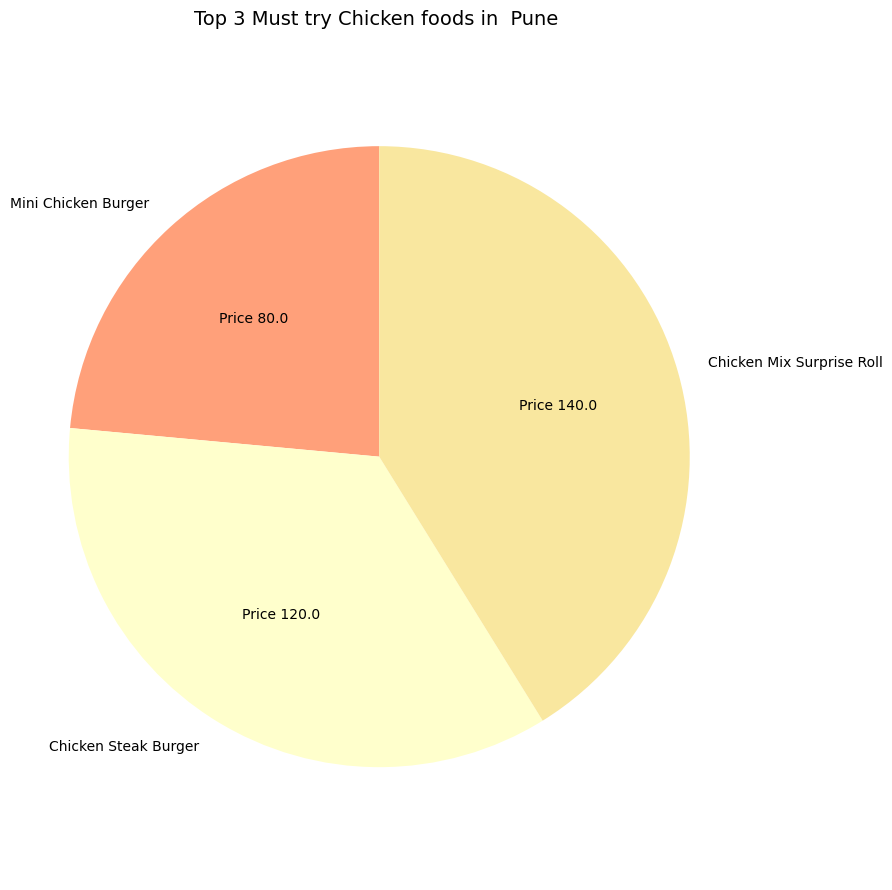

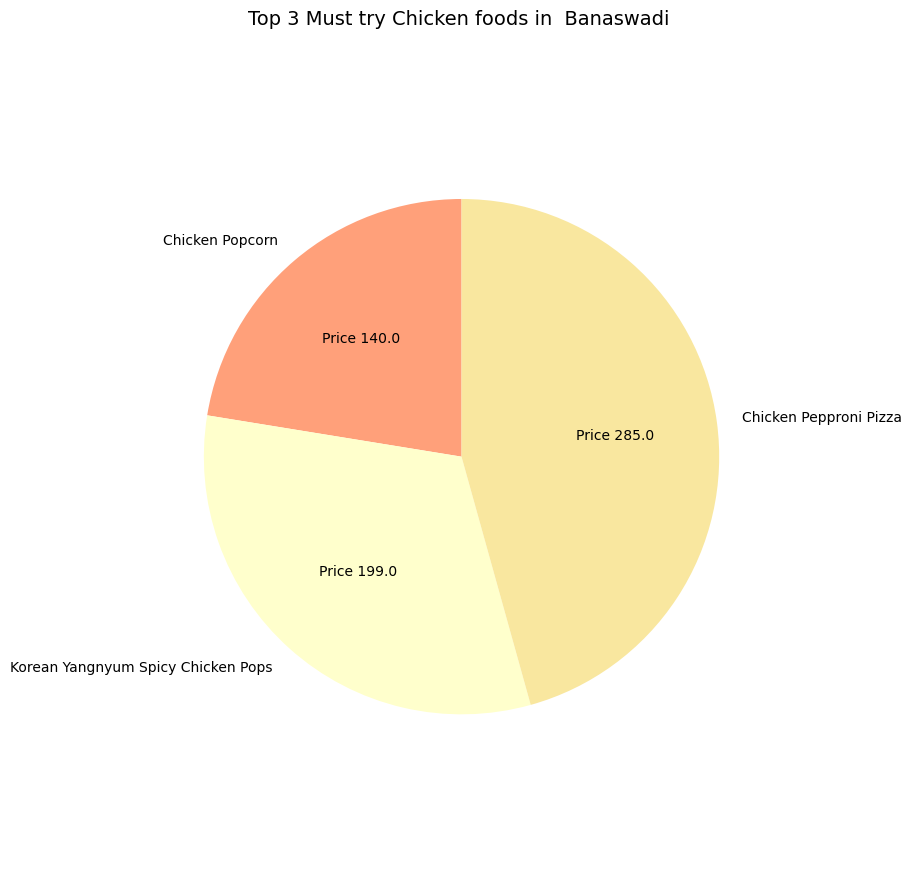

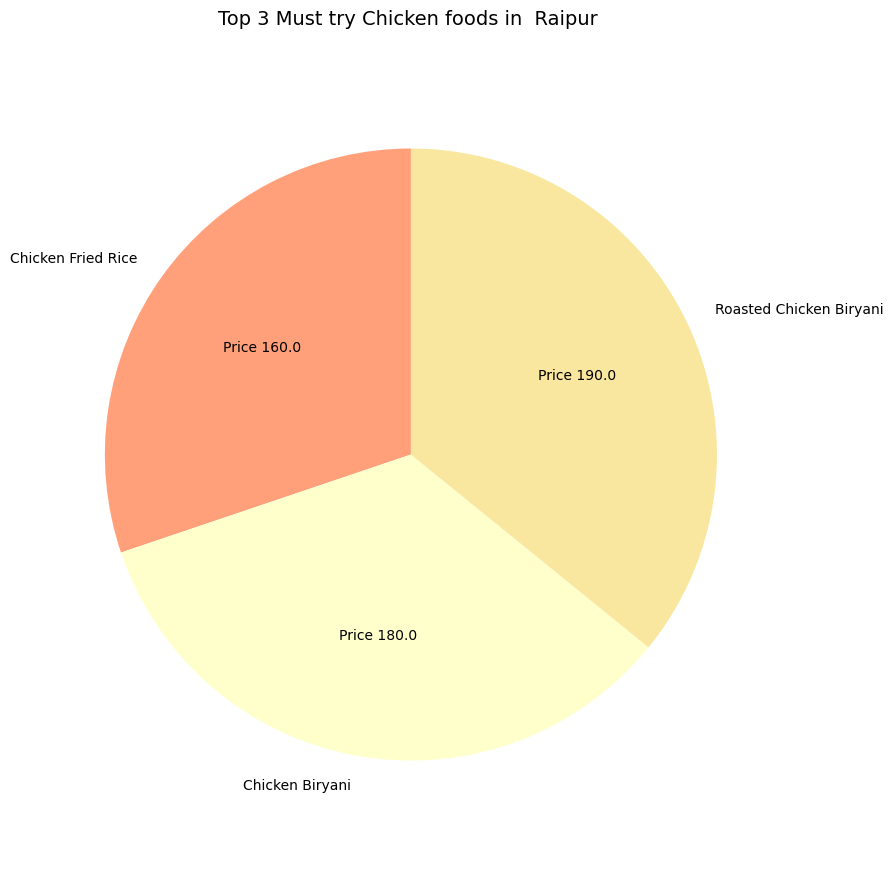

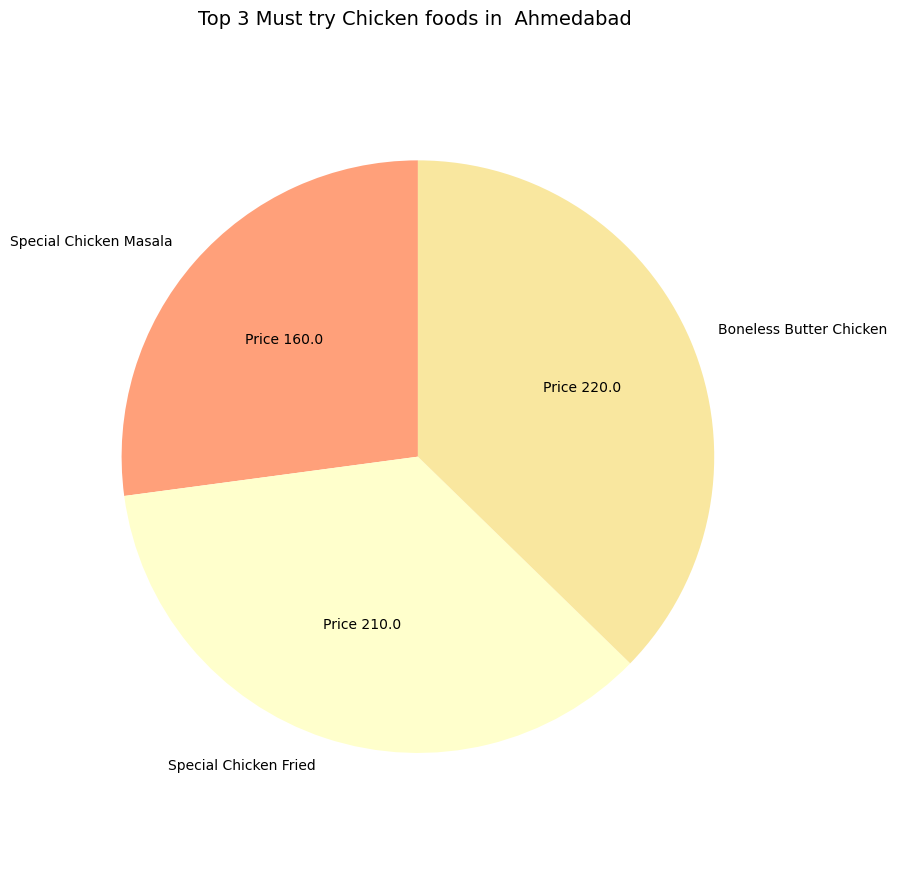

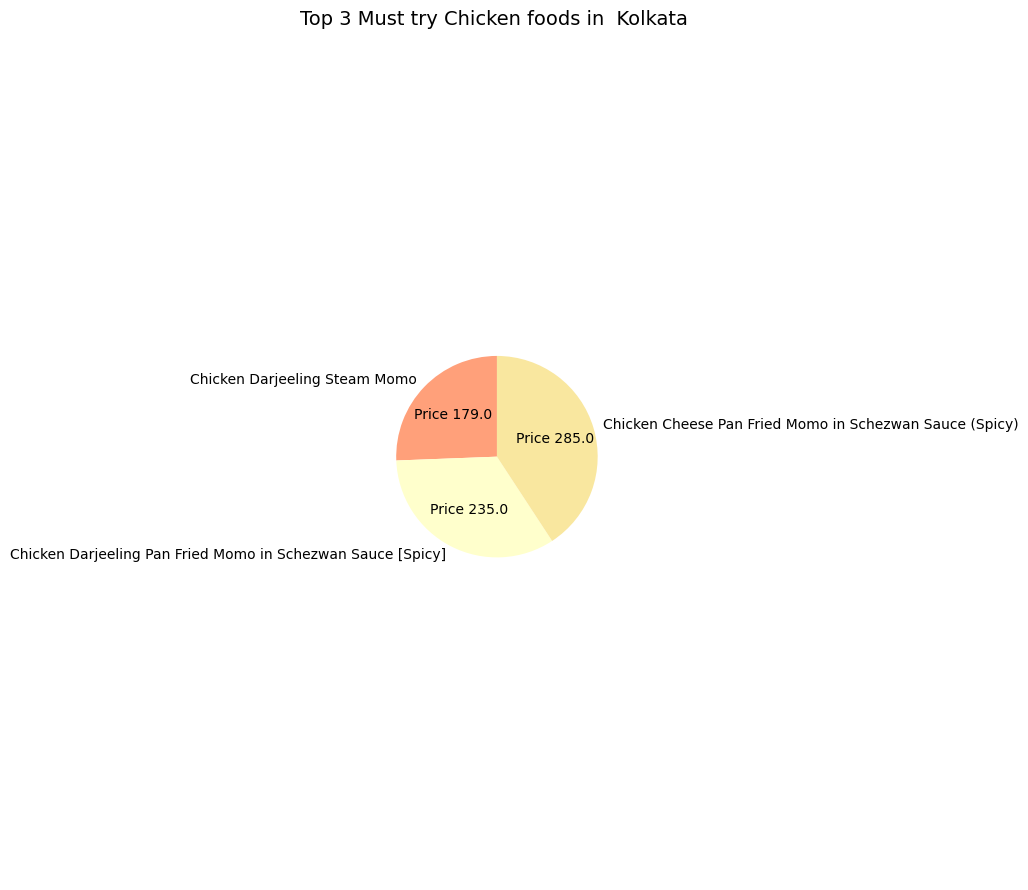

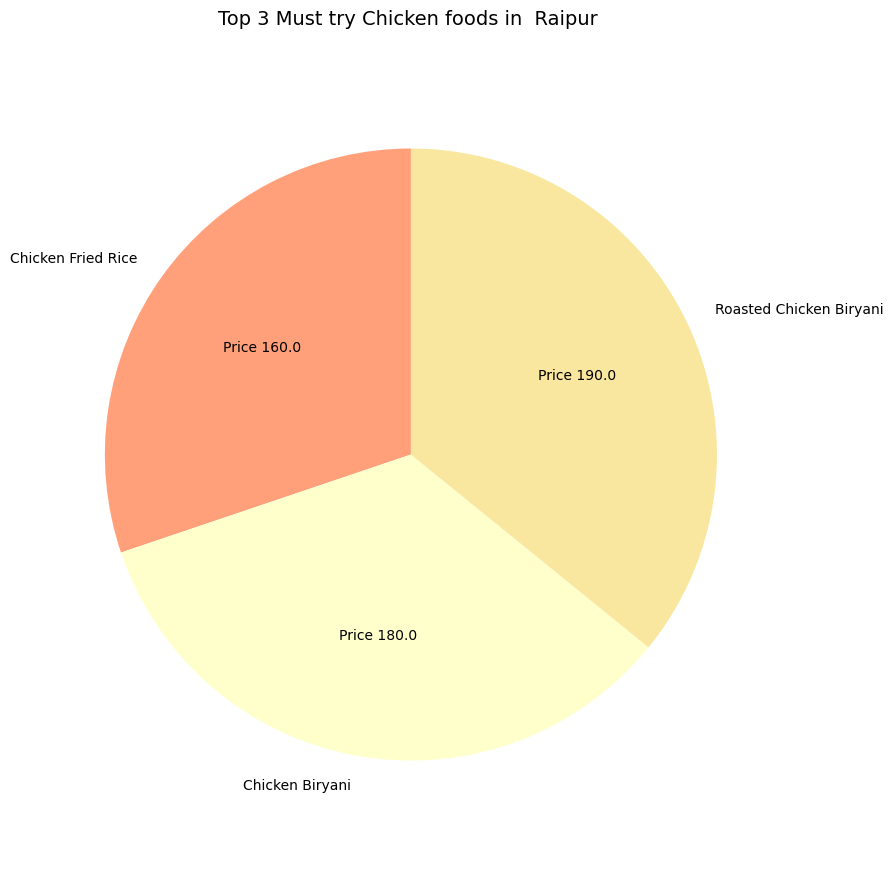

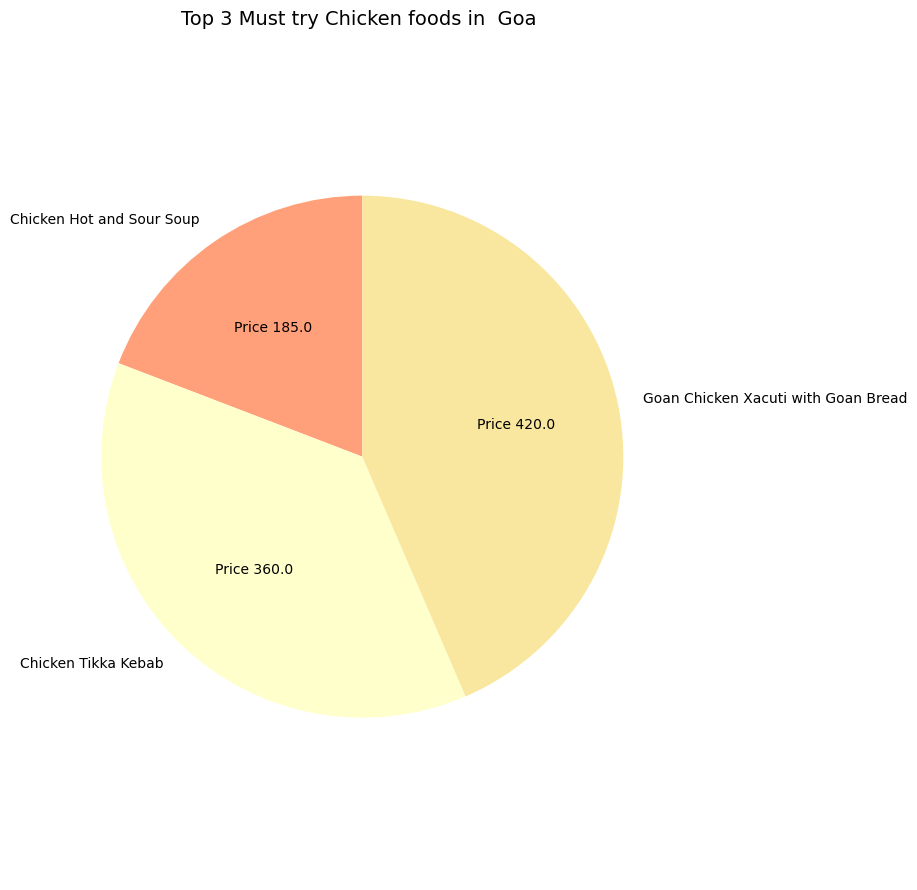

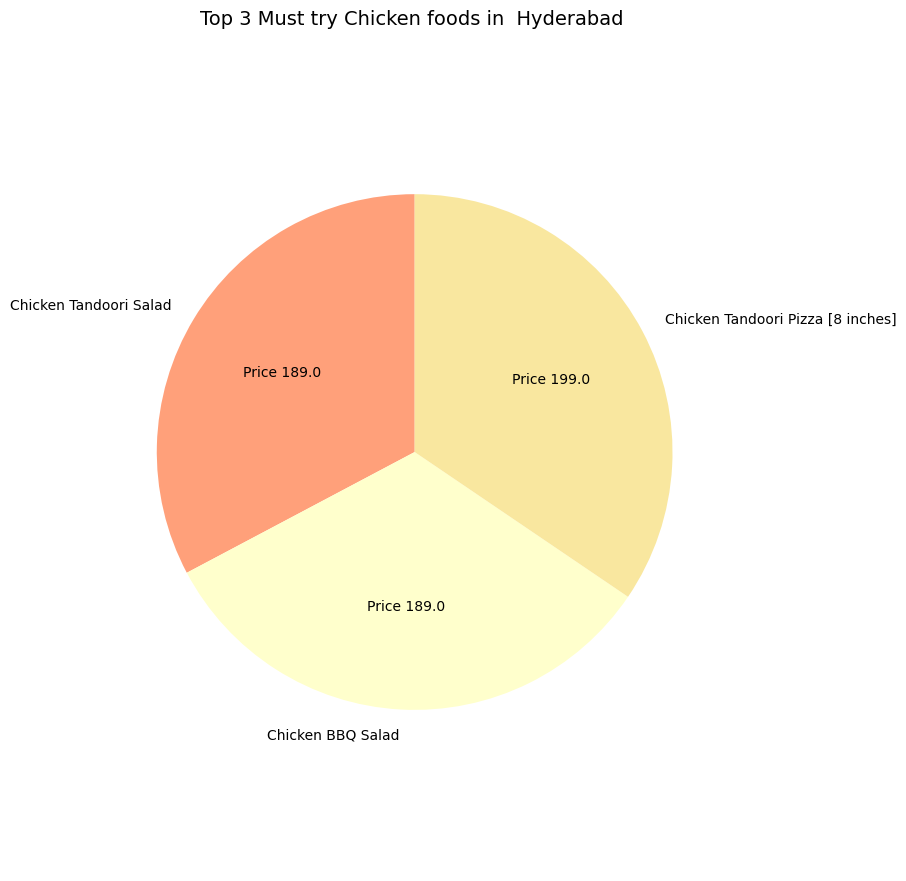

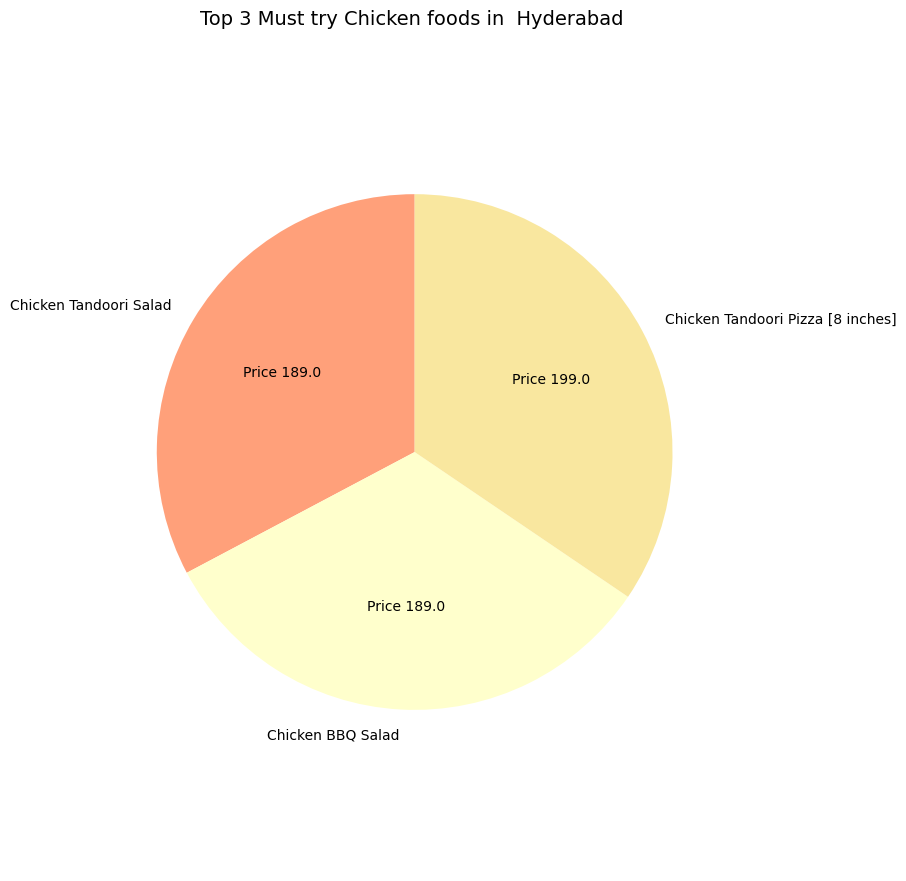

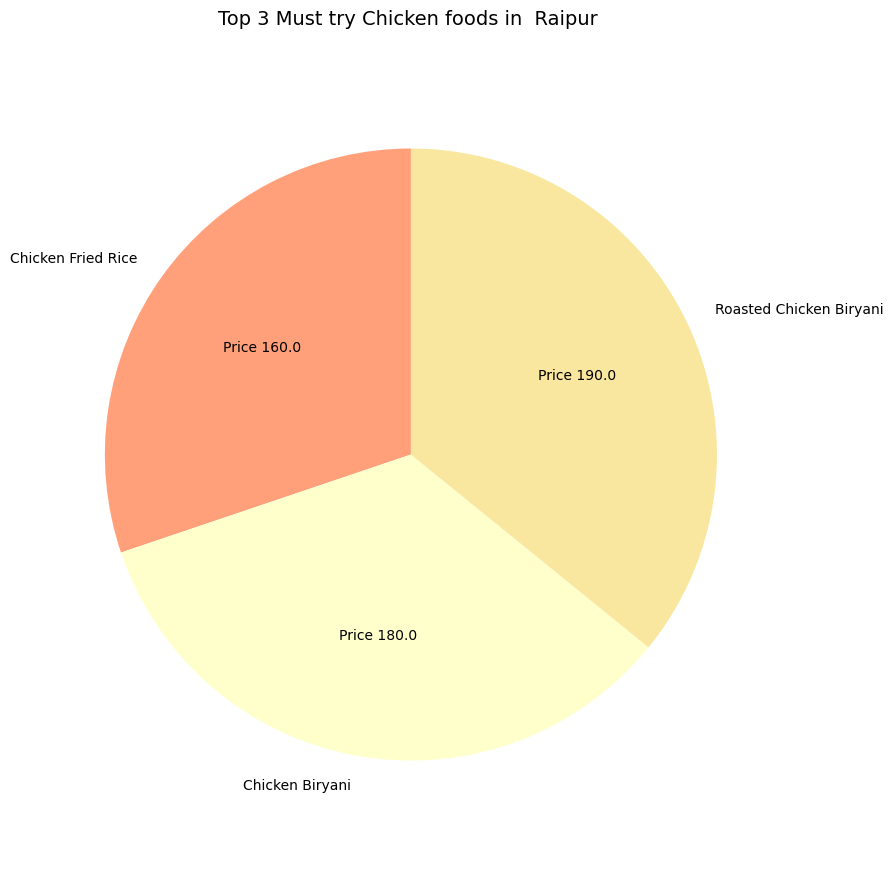

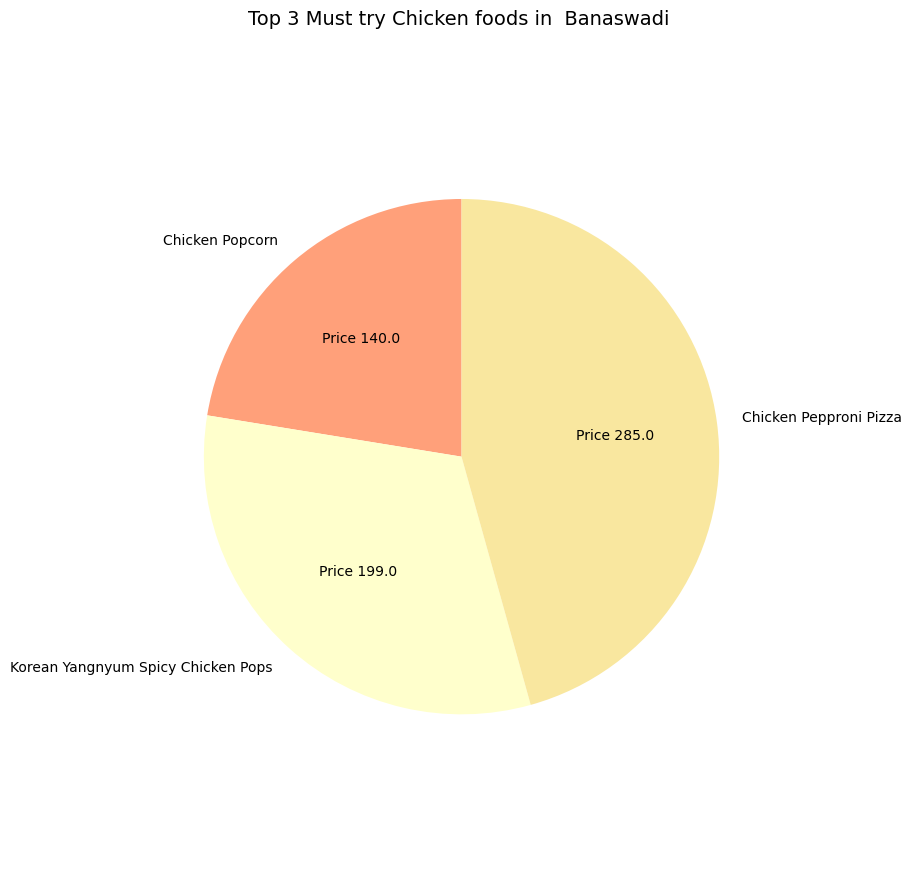

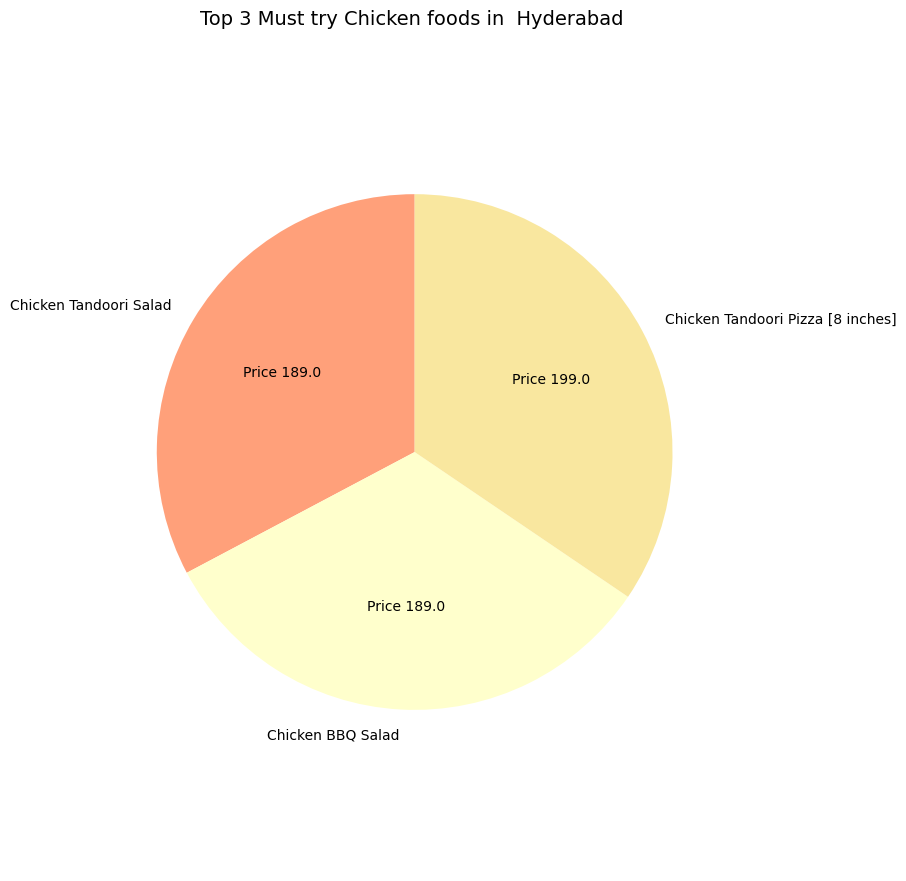

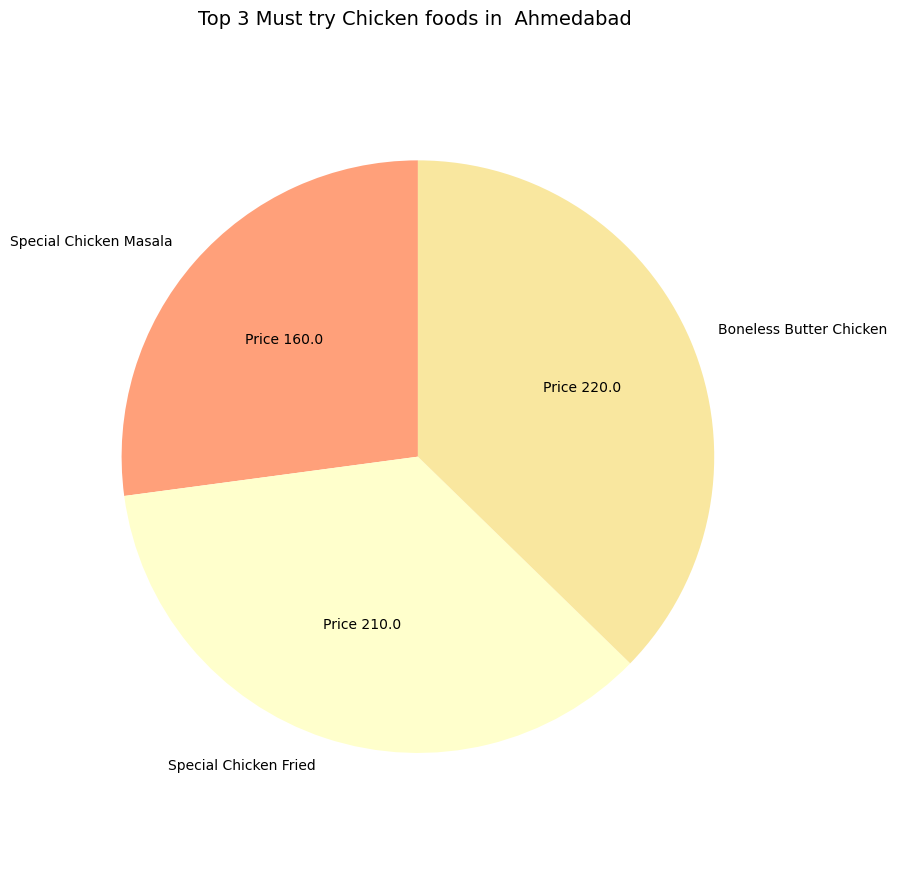

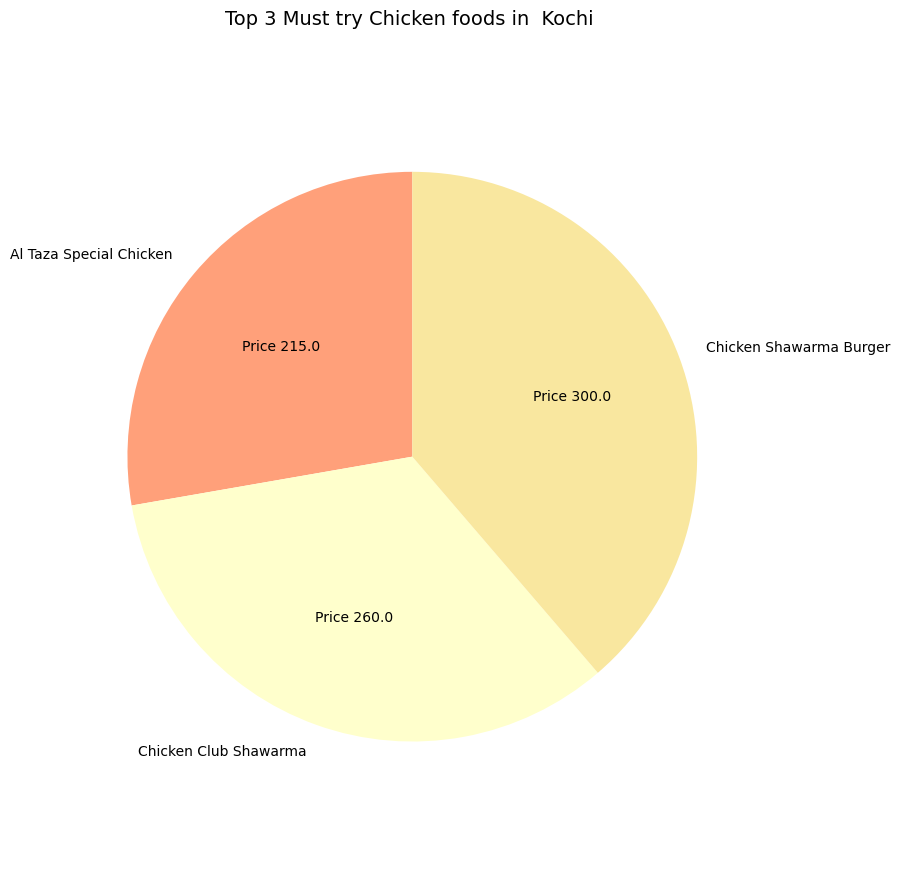

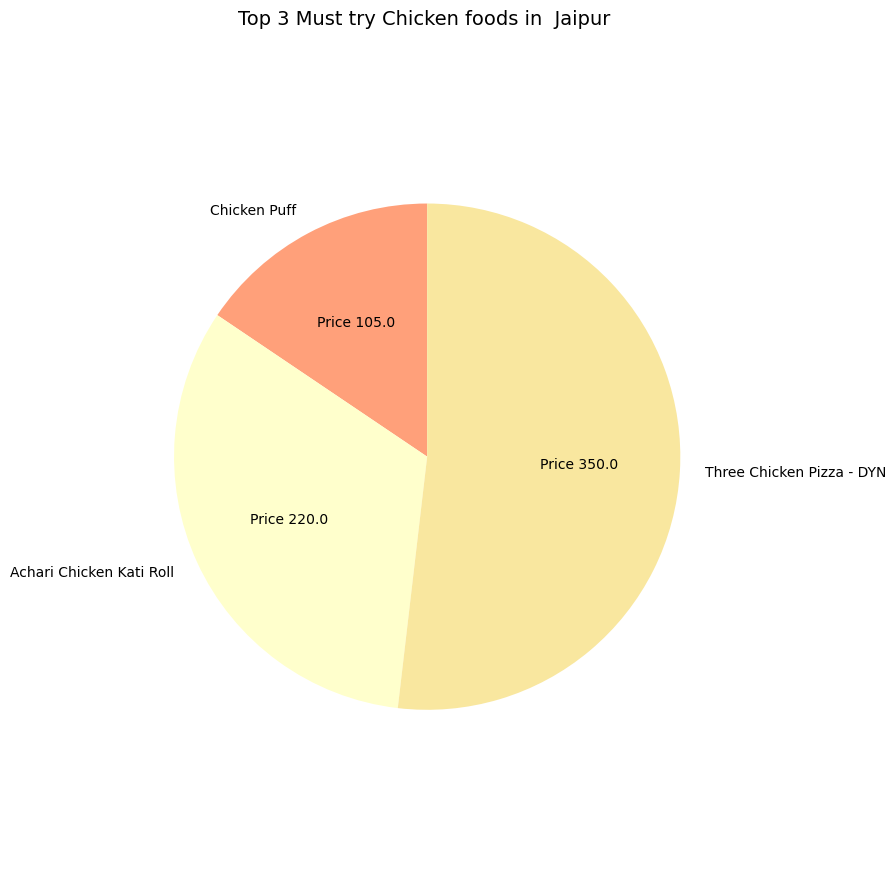

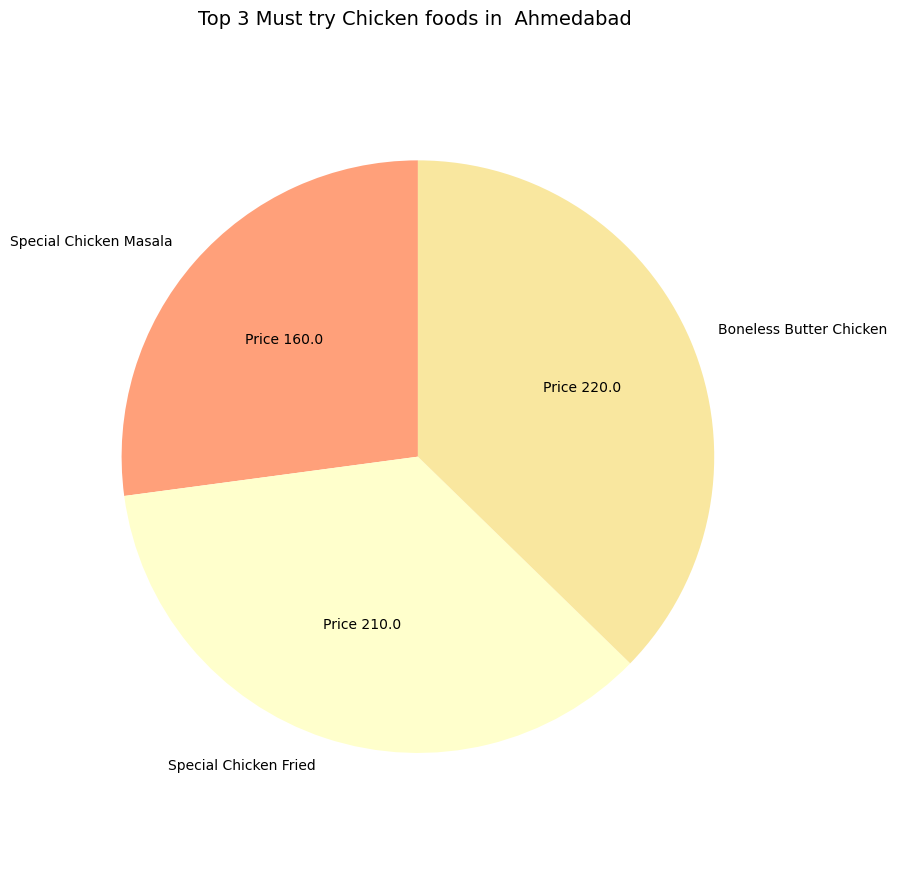

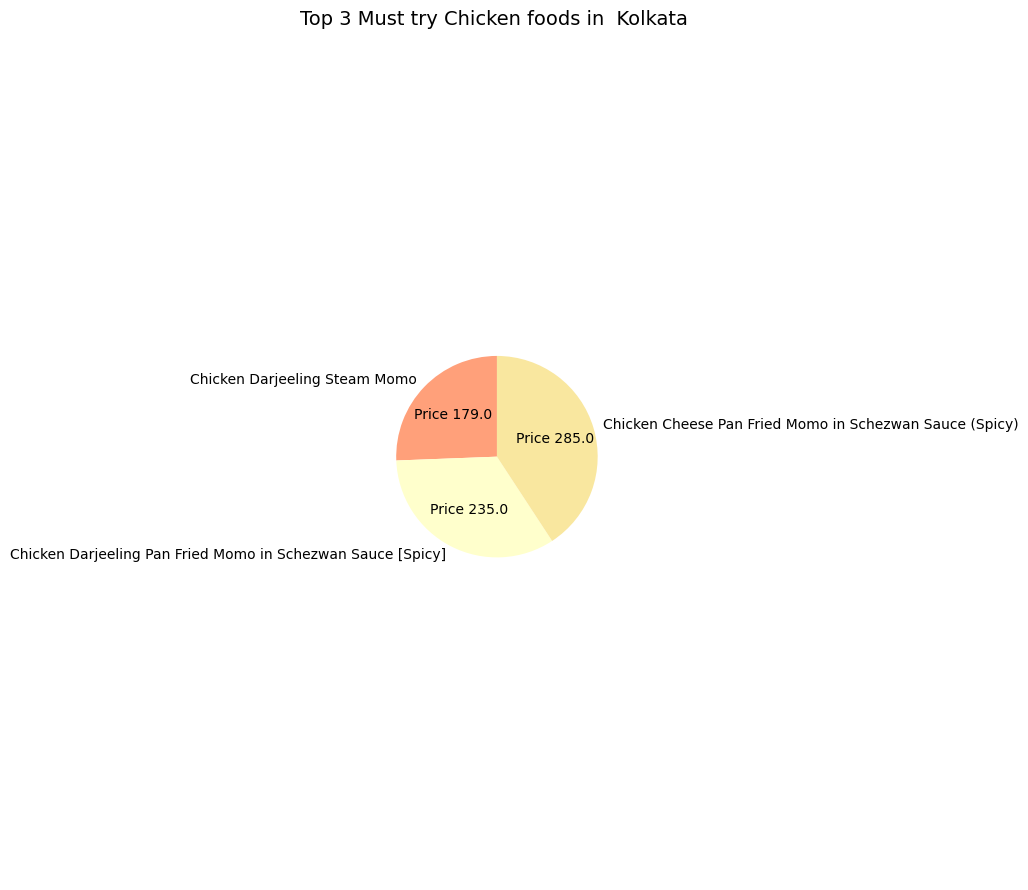

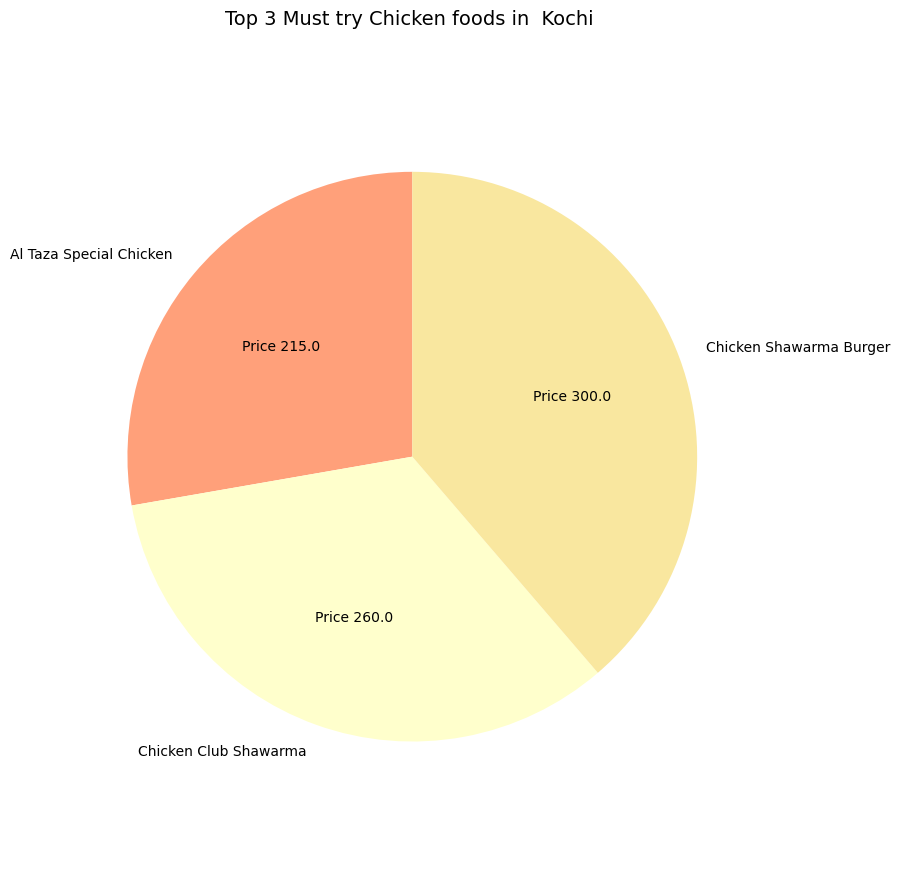

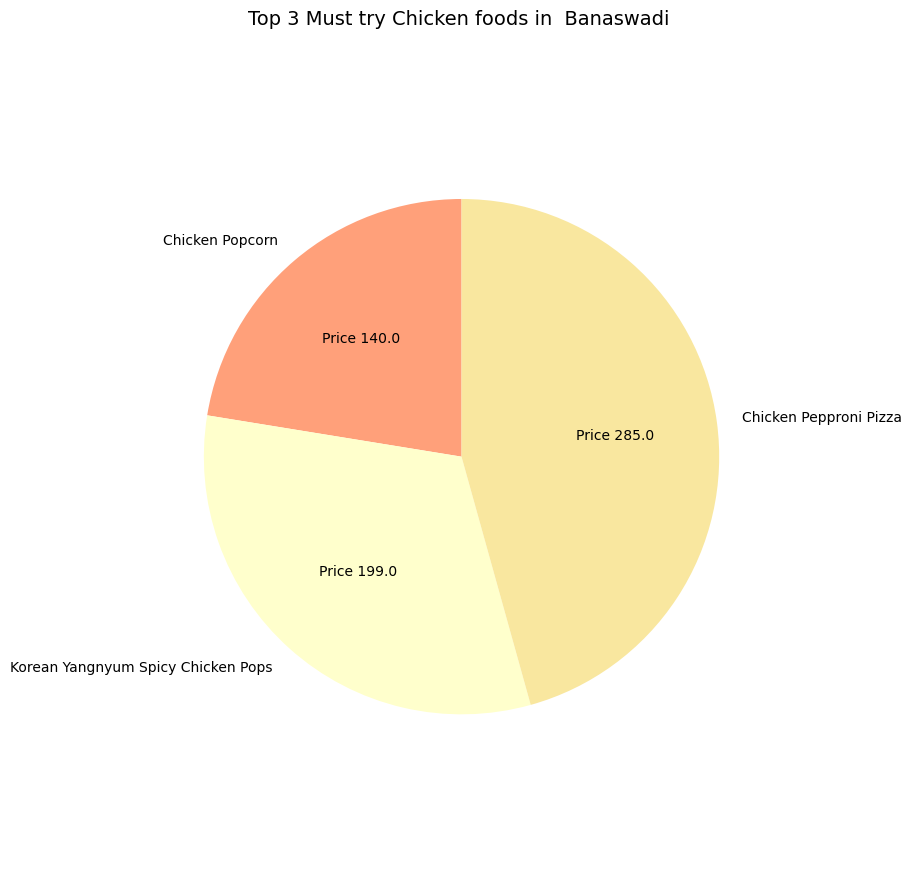

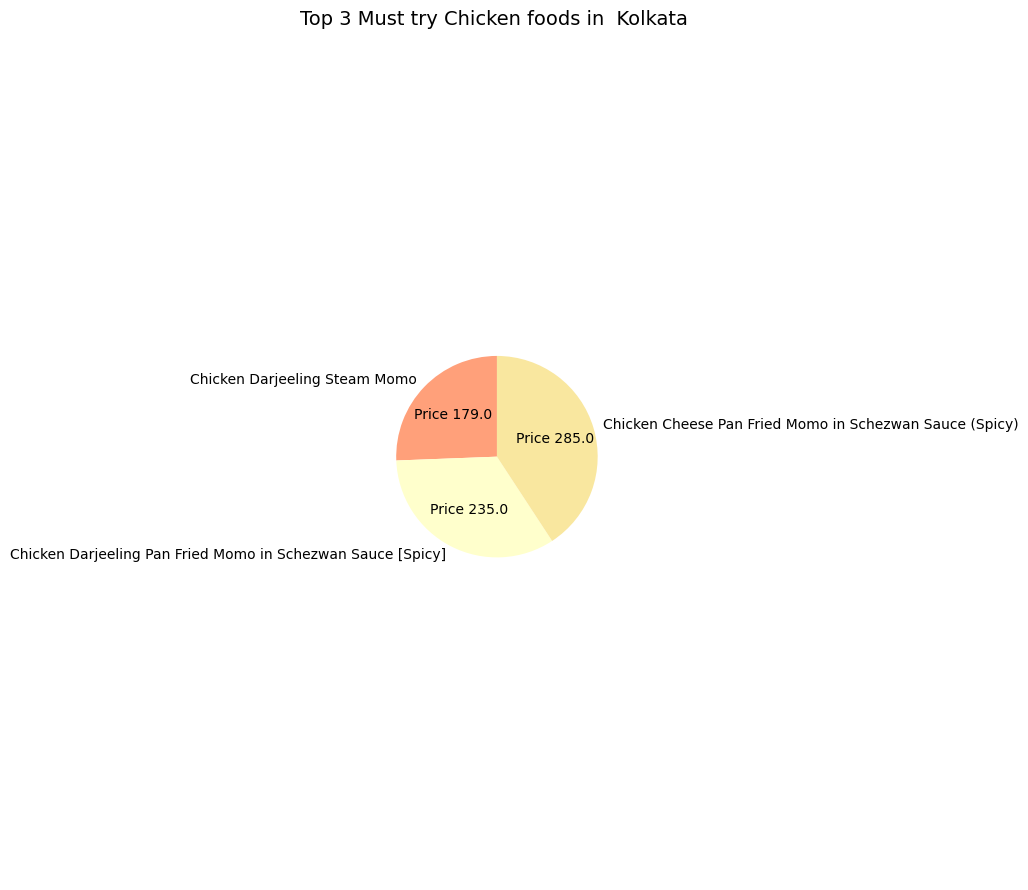

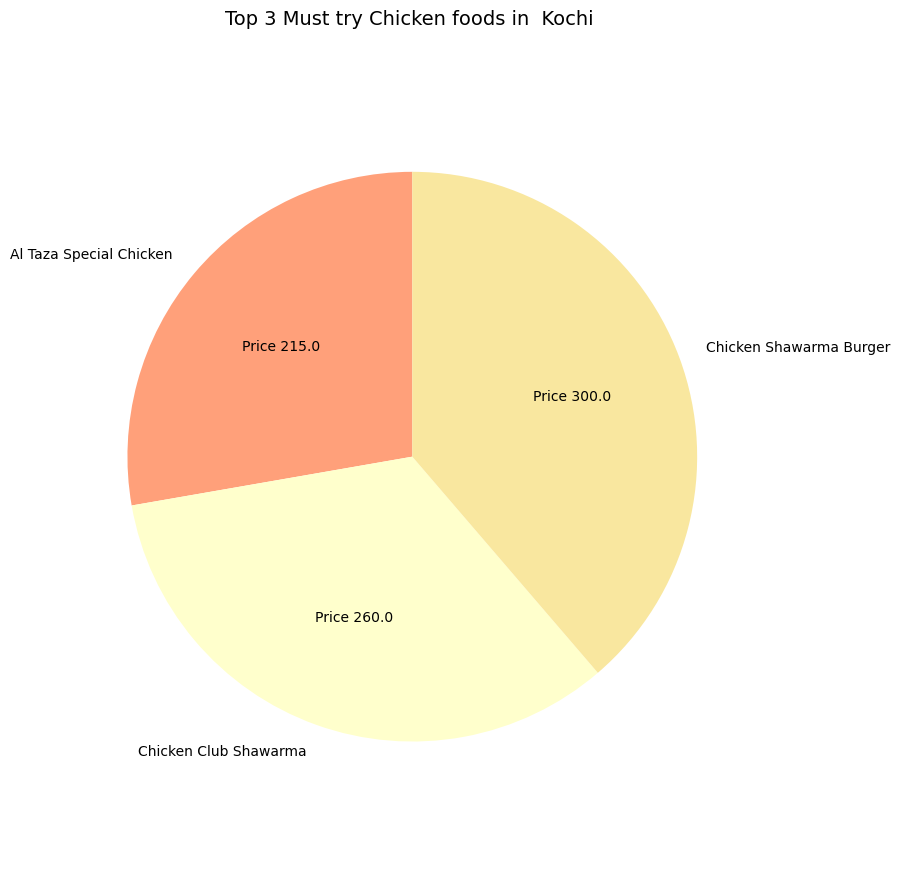

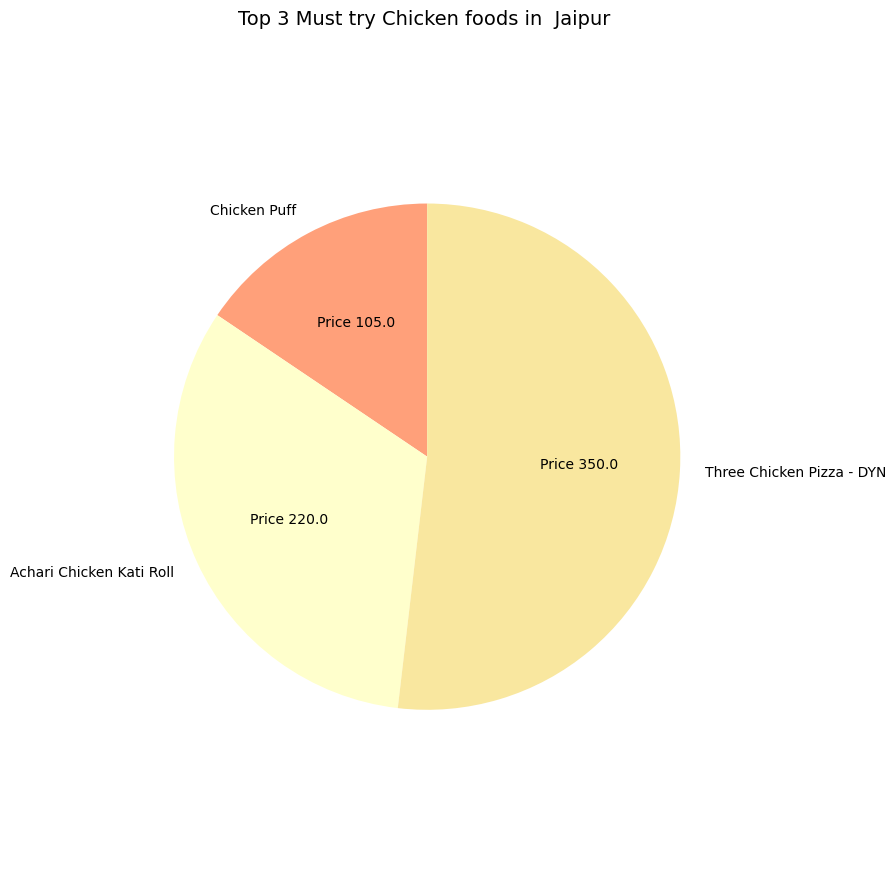

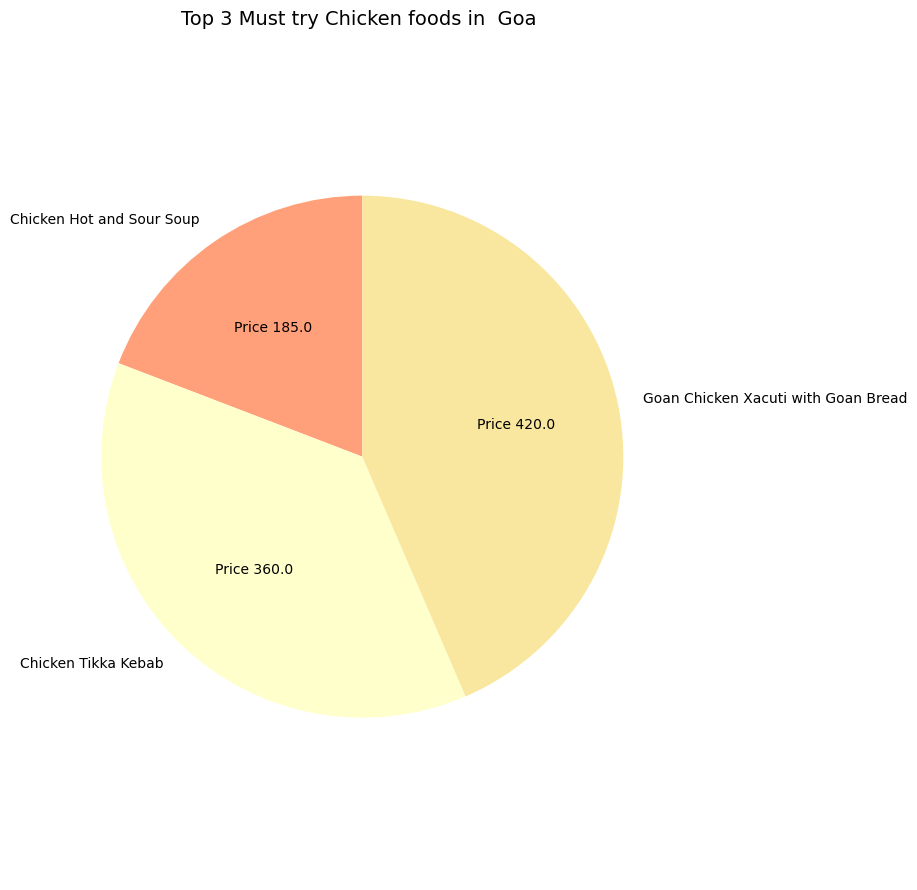

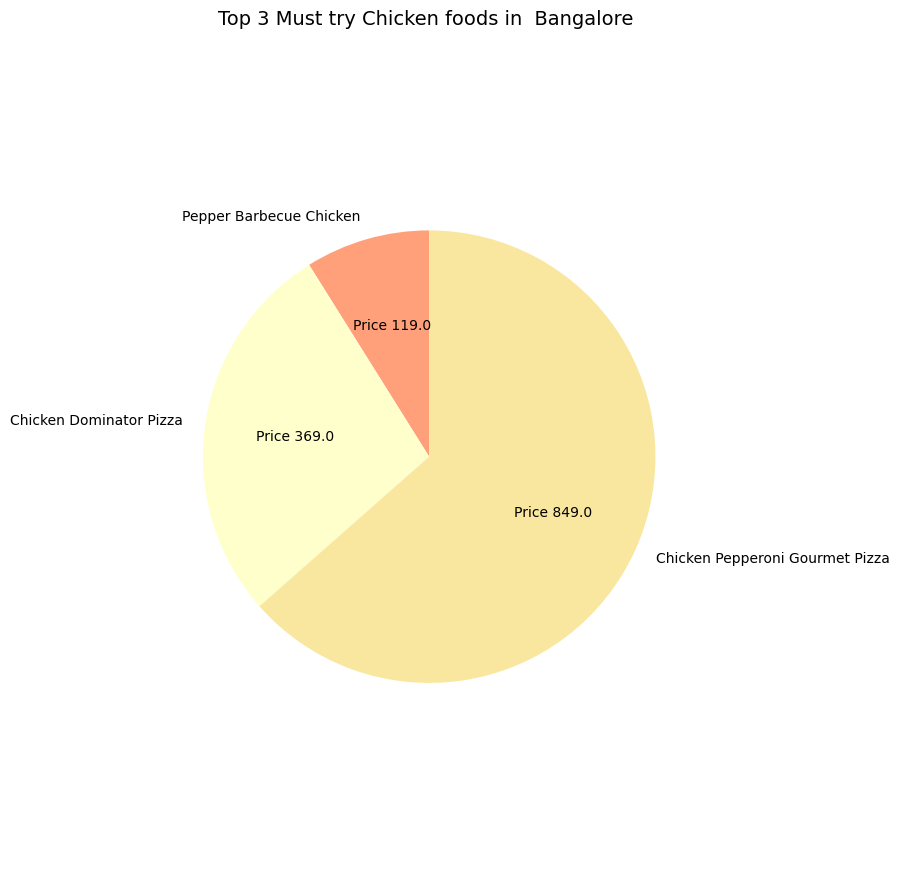

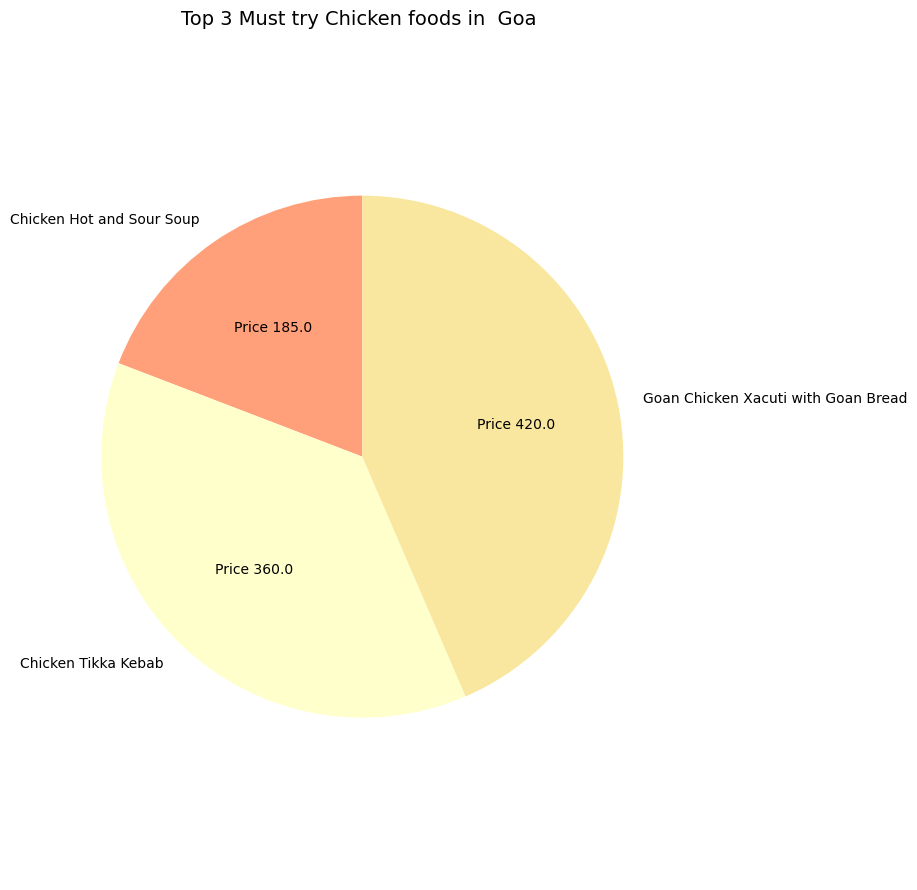

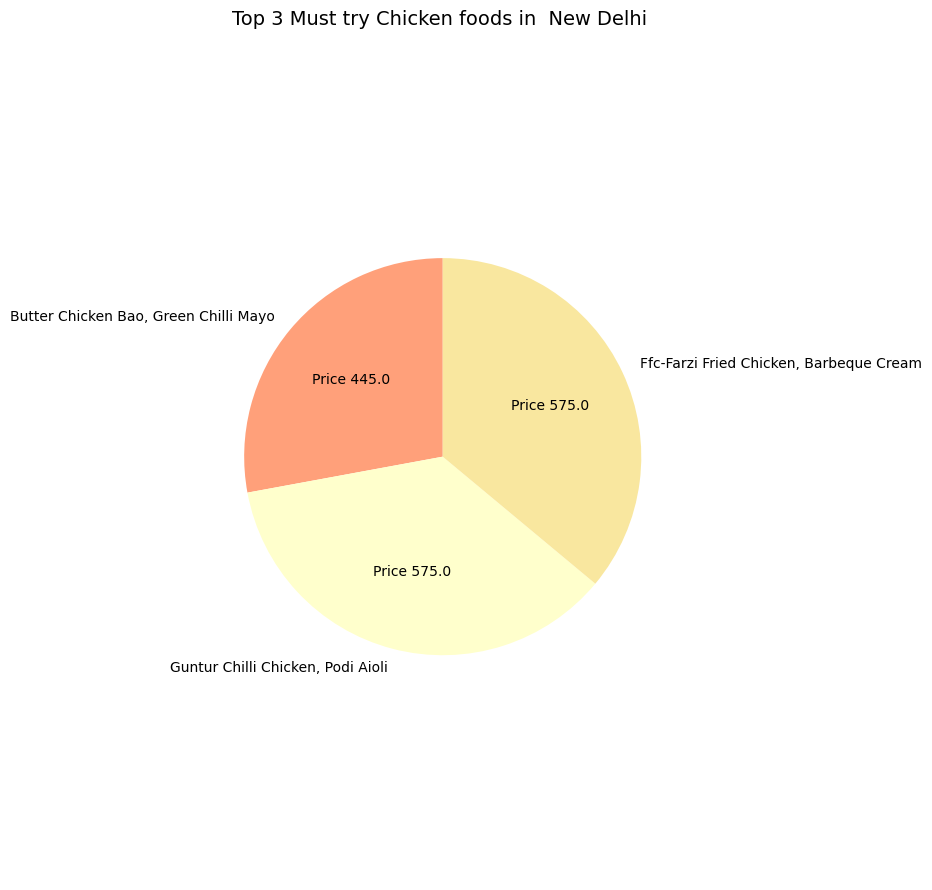

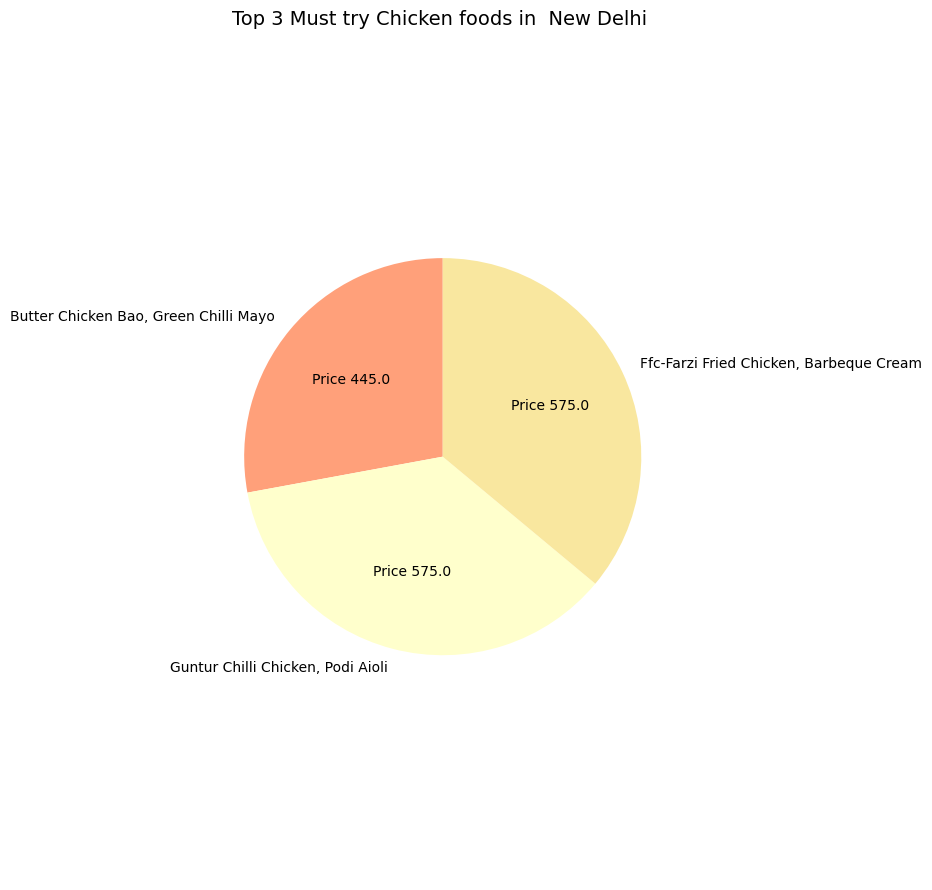

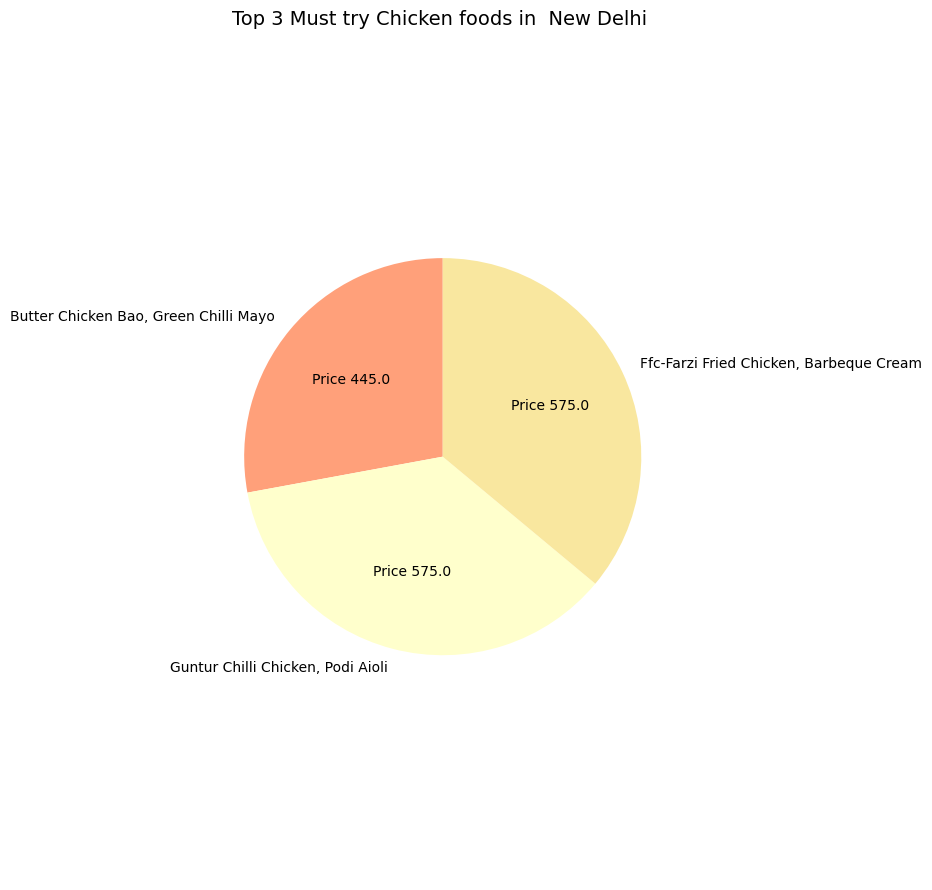

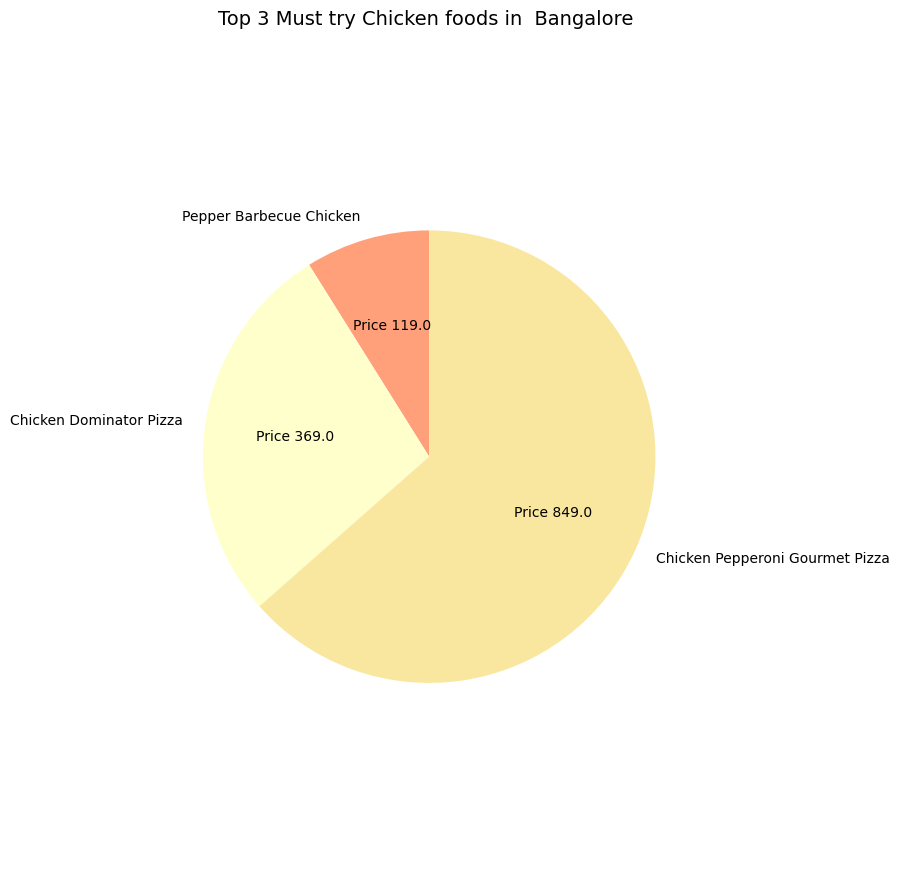

In [94]:
for city in chicken_city.index:

    colors = ["#FFA07A","#FFFFCC","#F9E79F"]

    # create a filter for each city
    city_filter = zomato_df["City"] == city

    # Create the pie chart with enhanced styling
    plt.figure(figsize=(9, 9))
    _, _, autotexts = plt.pie(
        chicken_city[chicken_city.index == city]["Prices"], 
        labels=chicken_city[chicken_city.index == city]["Item Name"], 
        colors=colors, 
        startangle=90,
                              autopct='', textprops={'fontsize': 10})

    # Add the dining ratings inside the pie chart
    for i, price in enumerate(chicken_city[chicken_city.index == city]["Prices"]):
        autotexts[i].set_text('Price {}'.format(price))

    # Customize the appearance of the plot
    plt.title('Top 3 Must try Chicken foods in {} '.format(city), fontsize=14)

    plt.axis('equal')  # Ensure an equal aspect ratio to make the pie circular

    plt.tight_layout()
    plt.show()